<a href="https://colab.research.google.com/github/DanaraDC/aes128/blob/main/AES128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritma AES128


**Import Library Pendukung**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

**Fungsi tampil gambar matriks**

In [ ]:
def display_table(matrix, nx, ny, title=''):
    plt.figure()
    tb = plt.table(cellText=matrix, loc=(0, 0), cellLoc='center')

    # Atur ukuran sel
    for i in range(ny):
        for j in range(nx):
            cell = tb.get_celld()[(i, j)]
            cell.set_height(1 / ny)
            cell.set_width(1 / nx)

    # Menghapus sumbu x dan y
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])

    if title:
      plt.title(title, fontsize=14, pad=10)


    plt.show()


**Inisialisasi Plaintext & Kunci (Key)**

In [ ]:
plaintext = [
    ['D', 'a', 'n', 'a'],
    ['r', 'a', 'I', 'n'],
    ['e', 'l', 't', 'y'],
    ['M', 'i', 'l', 'a']
]


key = [
    ['K', 'R', 'I', 'P'],
    ['T', 'O', 'G', 'R'],
    ['A', 'F', 'I', 'A'],
    ['E', 'S', 'K', 'U']
]

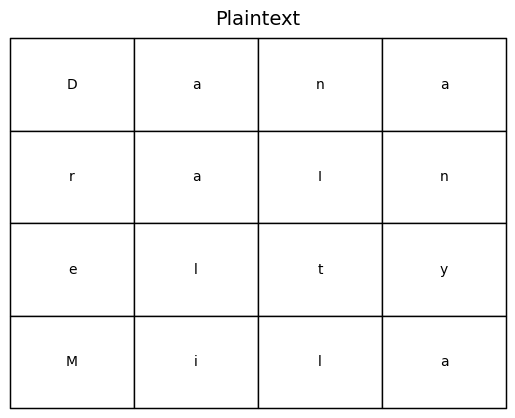

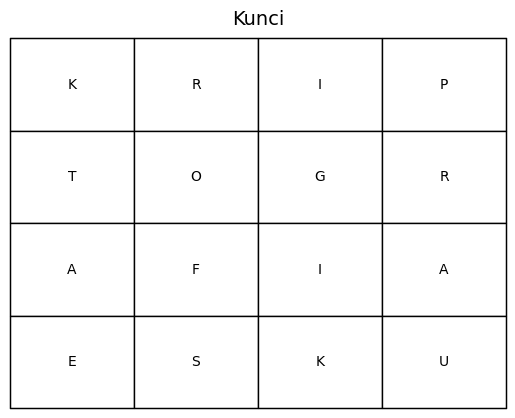

In [ ]:
display_table(plaintext, 4, 4, 'Plaintext')
display_table(key, 4, 4, 'Kunci')

**Ubah Plaintext dan Key ke ASCII Hex**

AES bekerja pada ukuran byte dimana parameter yang diproses adalah 16 byte / 16 character

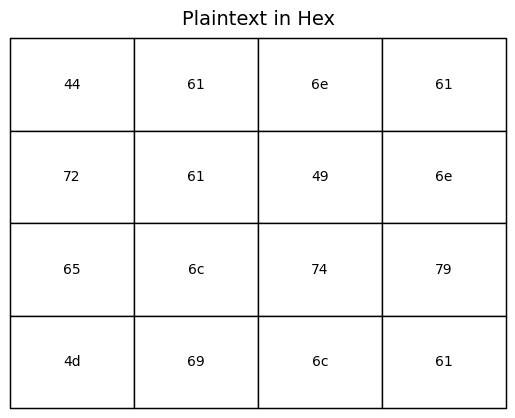

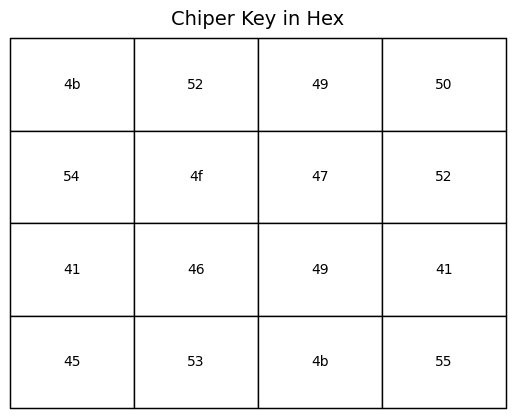

In [ ]:
# Konversi ke ASCII hex
plaintext_ascii_hex = [[hex(ord(char))[2:] for char in row] for row in plaintext]
key_ascii_hex = [[hex(ord(char))[2:] for char in row] for row in key]

display_table(plaintext_ascii_hex, 4, 4, 'Plaintext in Hex')
display_table(key_ascii_hex, 4, 4, 'Chiper Key in Hex')


**Inisialisasi Matrix Transformasi S-Box**

In [ ]:
s_box = [
    [0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76],
    [0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0],
    [0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15],
    [0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75],
    [0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84],
    [0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf],
    [0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8],
    [0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2],
    [0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73],
    [0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb],
    [0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79],
    [0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08],
    [0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a],
    [0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e],
    [0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf],
    [0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16],
]

In [ ]:
def display_sbox(sbox, title):
    plt.figure(figsize=(10, 8))
    tb = plt.table(cellText=[[hex(cell)[2:].zfill(2) for cell in row] for row in sbox],
                   loc='center', cellLoc='center', fontsize=12)
    tb.auto_set_font_size(False)
    tb.set_fontsize(12)

    # Mengatur ukuran sel
    for i in range(len(sbox)):
        for j in range(len(sbox[i])):
            cell = tb.get_celld()[(i, j)]
            cell.set_height(1 / len(sbox))
            cell.set_width(1 / len(sbox[0]))

    # Menghapus sumbu
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    plt.box(False)

    # Judul
    plt.title(title, fontsize=14, pad=10)

    plt.show()

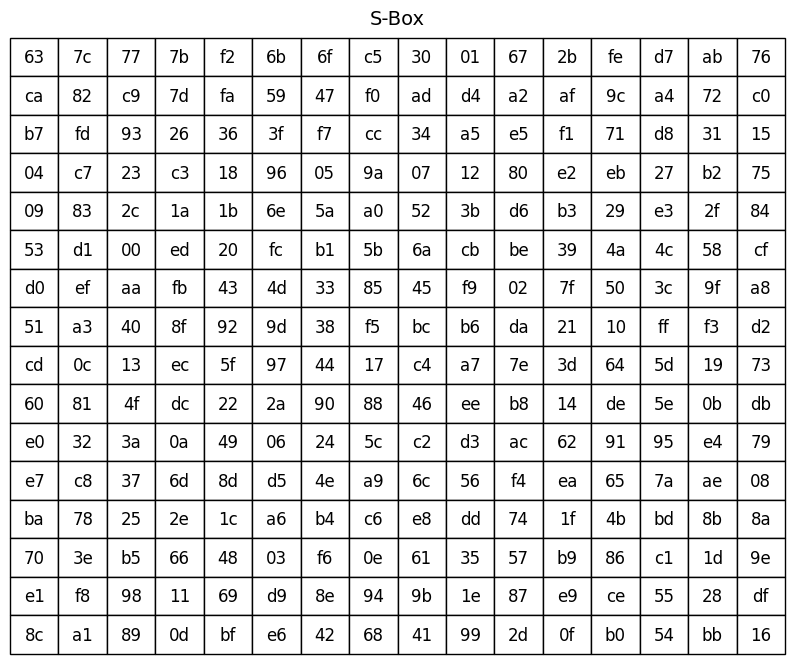

In [ ]:
display_sbox(s_box, 'S-Box')

**Inisialisasi RCon Konstanta**

In [ ]:
rcon = [
    0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1B, 0x36,
    0x6C, 0xD8, 0xAB, 0x4D, 0x9A, 0x2F, 0x5E, 0xBC, 0x63, 0xC6
]


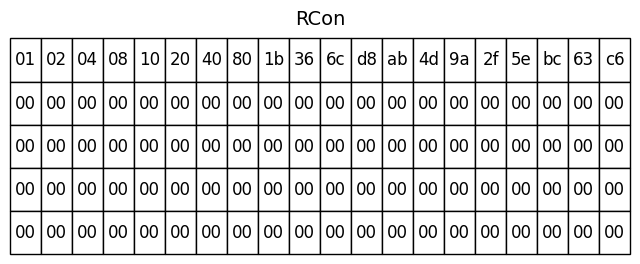

In [ ]:
def display_rcon(rcon, title='RCon', extra_rows=4):  # Tambahkan parameter extra_rows
    plt.figure(figsize=(8, 2 + extra_rows * 0.2))  # Sesuaikan ukuran figur

    # Tambahkan baris dengan nilai 0 ke cellText
    cell_text = [[hex(val)[2:].zfill(2) for val in rcon]]
    for _ in range(extra_rows):
        cell_text.append(['00'] * len(rcon))  # Tambahkan baris 0

    tb = plt.table(cellText=cell_text,
                   loc='center', cellLoc='center', fontsize=12)
    tb.auto_set_font_size(False)
    tb.set_fontsize(12)

    # Mengatur ukuran sel
    num_rows = 1 + extra_rows  # Total jumlah baris
    for i in range(num_rows):
        for j in range(len(rcon)):
            cell = tb.get_celld()[(i, j)]
            cell.set_height(1 / num_rows)  # Sesuaikan tinggi sel
            cell.set_width(1 / len(rcon))

    # Menghapus sumbu
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    plt.box(False)

    # Judul
    plt.title(title, fontsize=14, pad=10)
    plt.show()

# Menampilkan RCon dengan 4 baris tambahan
display_rcon(rcon, extra_rows=4)

# **Key Scheduling Algorithm / Key Expansion (Algoritma Pembangkitan Kunci)**

Key Scheduling Algorithm / Algoritma Pembentukan kunci memeliki beberapa fungsi penting / utama yakni:



1.   Rot Word
2.   Sub Word
3.   XOR Constanta (Rcon)



In [ ]:
def hex_to_int(hex_val):
    """Mengkonversi nilai hex ke integer."""
    if isinstance(hex_val, str):  # Memastikan bahwa input adalah string
        return int(hex_val, 16)
    return int(format(hex_val, 'x'), 16)  # Format angka ke string hex sebelum konversi

def int_to_hex(int_val):
    """Mengkonversi integer ke string hex."""
    return format(int_val, '02X')

def transpose(matrix):
    """Transpose matriks 4x4."""
    return [list(row) for row in zip(*matrix)]

def rot_word(word):
    """Rotasi 32-bit word ke kiri satu byte."""
    return word[1:] + word[:1]

def sub_word(word, s_box):
    """Mengganti nilai dengan S-Box."""
    return [int_to_hex(s_box[hex_to_int(byte) >> 4][hex_to_int(byte) & 0x0F]) for byte in word]

def xor_words(word1, word2):
    """XOR dua word."""
    return [int_to_hex(hex_to_int(w1) ^ hex_to_int(w2)) for w1, w2 in zip(word1, word2)]

def key_expansion(key_hex, s_box, rcon):
    """Ekspansi kunci untuk menghasilkan round keys."""
    # Mulai dengan key asli
    expanded_keys = [transpose(key_hex)]
    key_size = 4  # Panjang kunci dalam kolom
    num_rounds = 10

    for round_num in range(1, num_rounds + 1):
        # Ambil kolom terakhir dari key sebelumnya
        prev_key = expanded_keys[-1]
        last_col = prev_key[-1]

        # 1. RotWord
        temp = rot_word(last_col)

        # 2. Sub Word
        temp = sub_word(temp, s_box)

        # 3. XOR dengan Rcon dan kolom pertama
        rcon_val = [rcon[round_num - 1], '00', '00', '00']
        temp = xor_words(temp, prev_key[0])
        temp = xor_words(temp, rcon_val)

        # Tambahkan kolom pertama ke kunci baru
        new_key = [temp]

        # XOR untuk kolom lainnya
        for i in range(1, key_size):
            temp = xor_words(new_key[-1], prev_key[i])
            new_key.append(temp)

        expanded_keys.append(new_key)

    return [transpose(key) for key in expanded_keys]


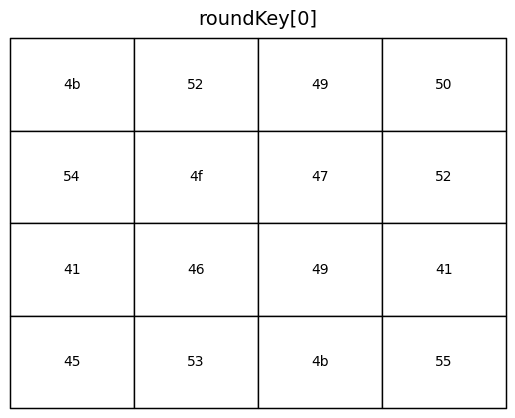

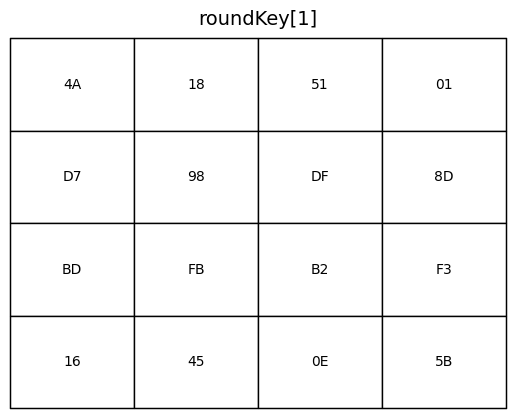

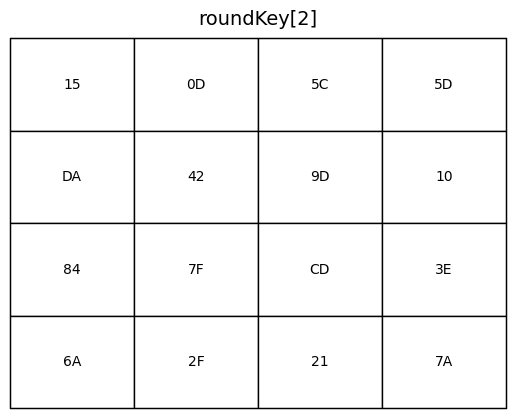

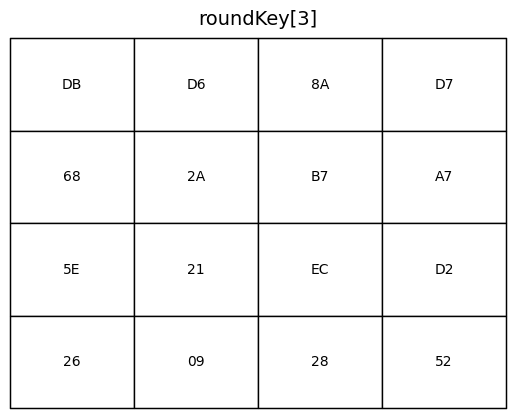

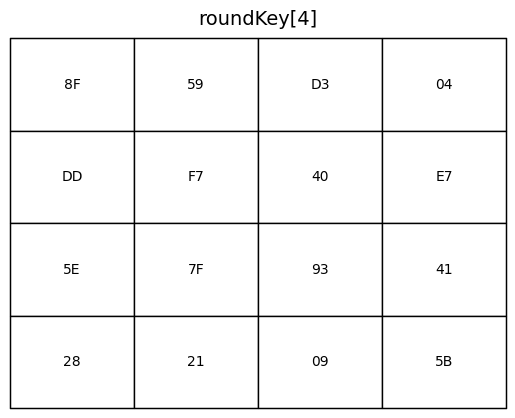

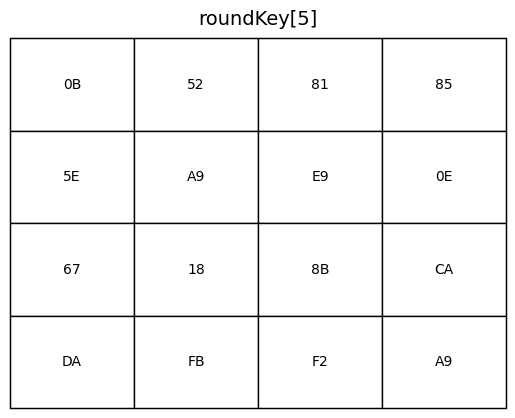

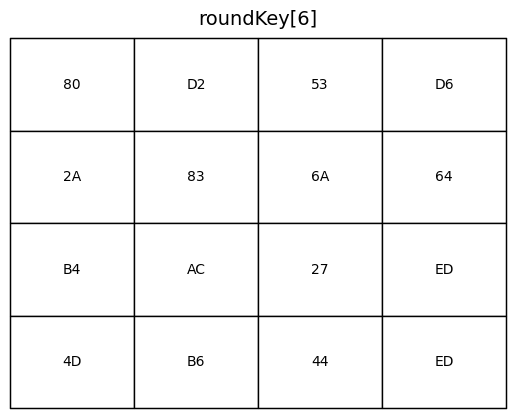

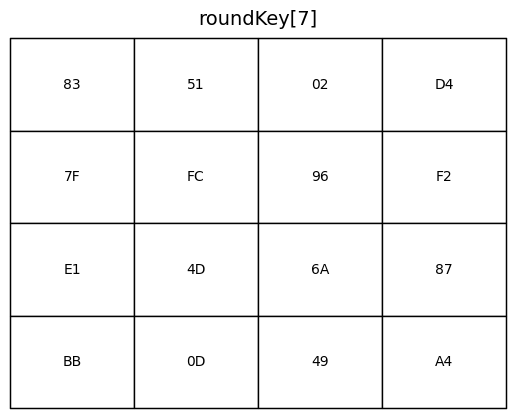

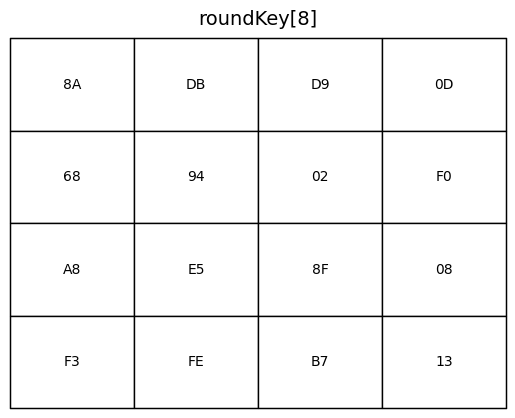

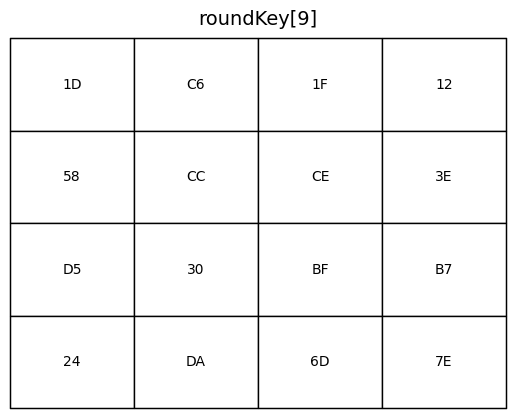

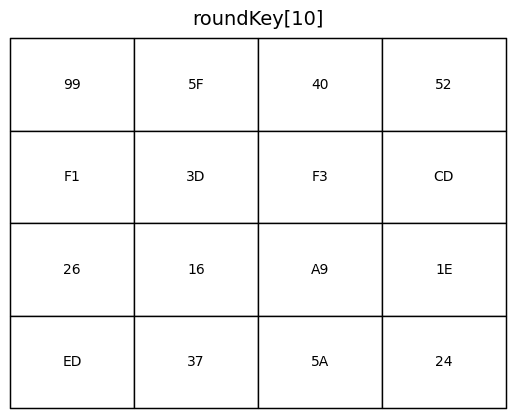

In [ ]:
# Menjalankan ekspansi kunci
round_keys = key_expansion(key_ascii_hex, s_box, rcon)

# Menampilkan hasil
for i, round_key in enumerate(round_keys):
    display_table(round_key, 4, 4, (f'roundKey[{i}]'))

# **Initial Round**

merupakan Meng Xor kan plaintext dengan CipheyKey dalam 8 bit biner

*Contoh: Ambil kolom 1 baris 1 pada tiap matrix plaintext dan cipherkey*

44 = 01000100

4b = 01001011

---------------------------  XOR

0f = 00001111

Lanjutkan hingga semua matrix selesai


*Contoh lagi Ambil  kolom 4 baris 2 matrix cipher key dan plaintext *

6e = 01101110

52 = 01010010

---------------------------  XOR

3C = 00111100


**Fungsi Kalkulasi XOR dalam Biner**

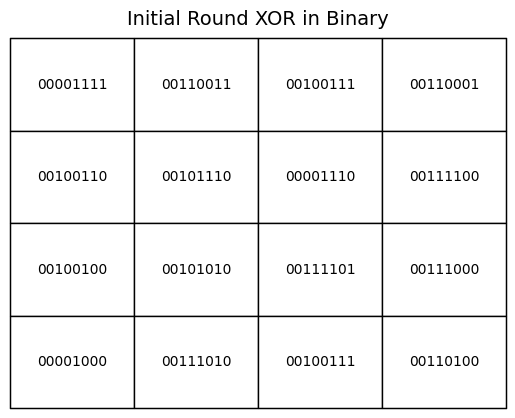

None


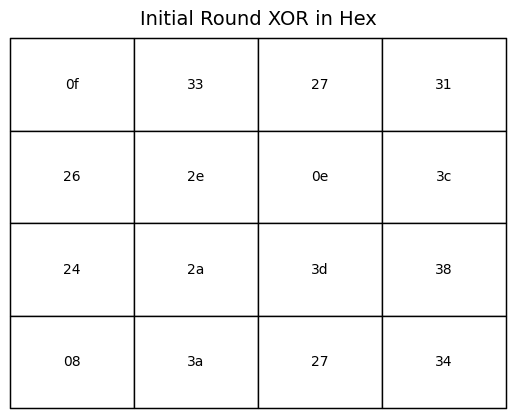

In [ ]:
def xor_hex_to_binary(plaintext_hex, key_hex):
    """
    Melakukan XOR antara plaintext_hex dan key_hex, hasilkan dalam bentuk hexadecimal.
    Juga mencetak hasil XOR dalam bentuk biner untuk debug.
    """
    res_print = []  # Untuk menyimpan hasil dalam bentuk biner (untuk ditampilkan)
    result = []  # Untuk menyimpan hasil dalam bentuk heksadesimal
    for p_row, k_row in zip(plaintext_hex, key_hex):
        result_row = []
        result_bin_print = []
        for p_hex, k_hex in zip(p_row, k_row):
            # Konversi hexadecimal ke integer
            p_bin = int(p_hex, 16)
            k_bin = int(k_hex, 16)
            # Lakukan XOR
            xor_bin = p_bin ^ k_bin
            # Konversi hasil XOR ke biner (untuk ditampilkan)
            bin_value = bin(xor_bin)[2:].zfill(8)
            # Konversi hasil XOR ke hexadecimal
            xor_hex = hex(xor_bin)[2:].zfill(2)
            # Tambahkan ke hasil
            result_bin_print.append(bin_value)
            result_row.append(xor_hex)
        res_print.append(result_bin_print)
        result.append(result_row)
    # Cetak hasil biner untuk debug

    print(display_table(res_print,4,4, 'Initial Round XOR in Binary'))

    return result


# Lakukan XOR
initial_round = xor_hex_to_binary(plaintext_ascii_hex, key_ascii_hex)

# Tampilkan hasil XOR dalam bentuk tabel
display_table(initial_round, 4, 4, 'Initial Round XOR in Hex')


# AES Fungsi Transformasi

Ada 4 tahap dalam Transformasi Kunci yaitu

1.   Sub Byte
2.   Shift Rows
3.   Mix Columns
4.   Add Round Keys



**Fungsi Sub Byte**

In [ ]:
# prompt: buatkan fugnsi subbytes buat enkripsi aes

def sub_bytes(state, s_box):
    """Substitutes bytes in the state matrix using the S-box."""
    for i in range(4):
        for j in range(4):
            # Convert hex string to integer
            row = hex_to_int(state[i][j]) >> 4
            col = hex_to_int(state[i][j]) & 0x0F
            # Substitute using the S-box
            state[i][j] = int_to_hex(s_box[row][col])
    return state

**Shift Rows**

In [ ]:
# prompt: buatkan fungsi shift rows

def shift_rows(state):
    """Shifts rows in the state matrix."""
    shifted_state = [row[:] for row in state]  # Create a copy to avoid modifying the original

    # Shift the second row one position to the left
    shifted_state[1] = shifted_state[1][1:] + shifted_state[1][:1]

    # Shift the third row two positions to the left
    shifted_state[2] = shifted_state[2][2:] + shifted_state[2][:2]

    # Shift the fourth row three positions to the left
    shifted_state[3] = shifted_state[3][3:] + shifted_state[3][:3]

    return shifted_state

**Mix Column**

In [ ]:
# prompt: buatkan fungsi mix column

def mix_columns(state):
    """Mixes the columns of the state matrix."""
    mixed_state = [['00'] * 4 for _ in range(4)]
    for col in range(4):
        s0 = hex_to_int(state[0][col])
        s1 = hex_to_int(state[1][col])
        s2 = hex_to_int(state[2][col])
        s3 = hex_to_int(state[3][col])

        # Perform matrix multiplication with fixed matrix
        mixed_state[0][col] = int_to_hex((gf_mult(s0, 0x02) ^ gf_mult(s1, 0x03) ^ s2 ^ s3) % 256)
        mixed_state[1][col] = int_to_hex((s0 ^ gf_mult(s1, 0x02) ^ gf_mult(s2, 0x03) ^ s3) % 256)
        mixed_state[2][col] = int_to_hex((s0 ^ s1 ^ gf_mult(s2, 0x02) ^ gf_mult(s3, 0x03)) % 256)
        mixed_state[3][col] = int_to_hex((gf_mult(s0, 0x03) ^ s1 ^ s2 ^ gf_mult(s3, 0x02)) % 256)

    return mixed_state

def gf_mult(a, b):
    """Performs Galois Field multiplication."""
    p = 0
    for i in range(8):
        if b & 1:
            p ^= a
        hi_bit_set = a & 0x80
        a <<= 1
        if hi_bit_set:
            a ^= 0x11b
        b >>= 1
    return p % 256


**Add Round Key**

In [ ]:
def add_round_key(state, round_key):
    """Adds the round key to the state matrix."""
    # Pastikan ukuran matriks sama
    if len(state) != len(round_key) or len(state[0]) != len(round_key[0]):
        raise ValueError("Ukuran matriks state dan round_key harus sama.")

    for i in range(4):
        for j in range(4):
            state[i][j] = int_to_hex(hex_to_int(state[i][j]) ^ hex_to_int(round_key[i][j]))
    return state

# **Iterasi Trasnformasi 9 Round**

Round 1


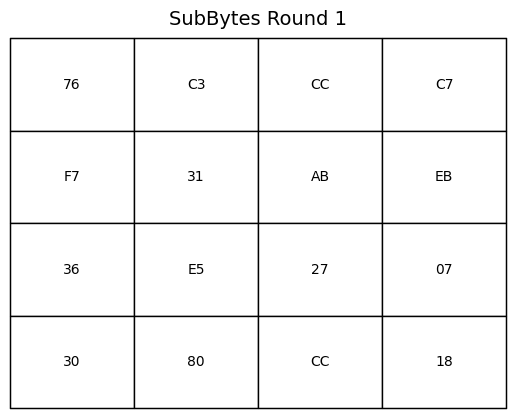

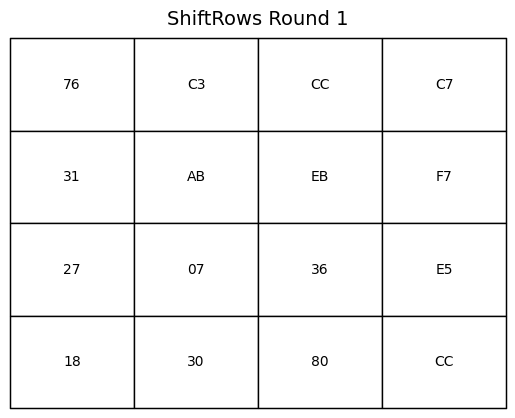

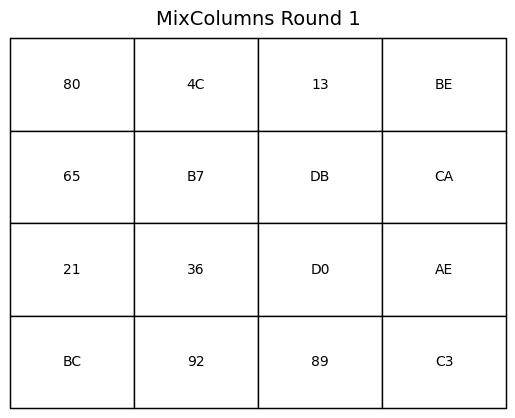

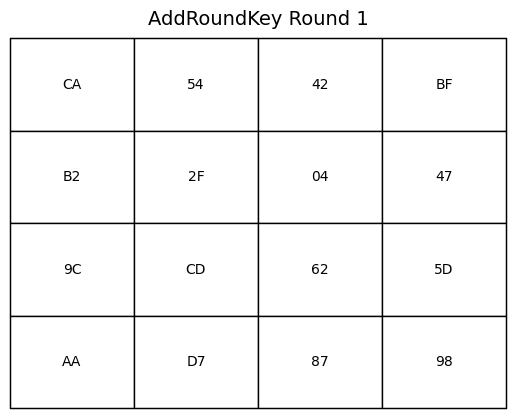

--------------------
Round 2


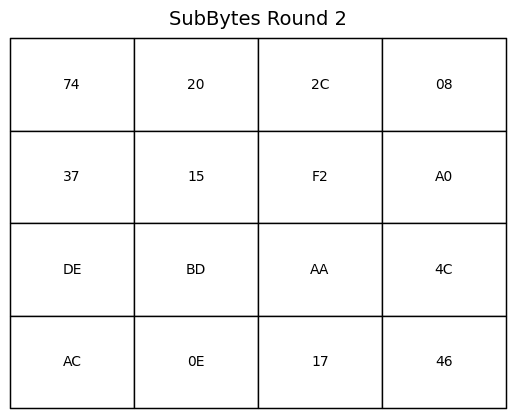

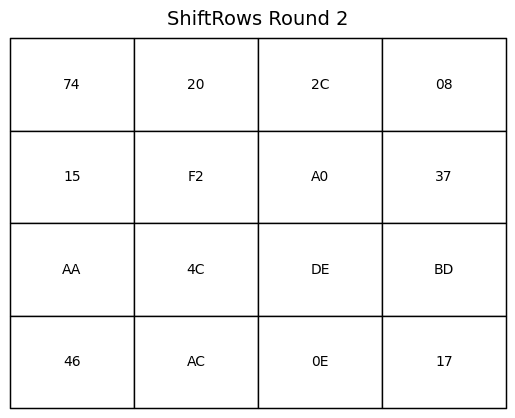

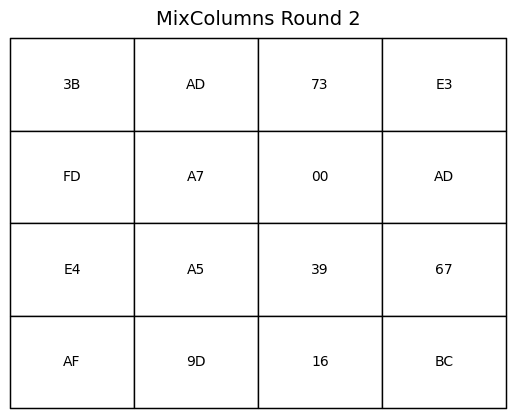

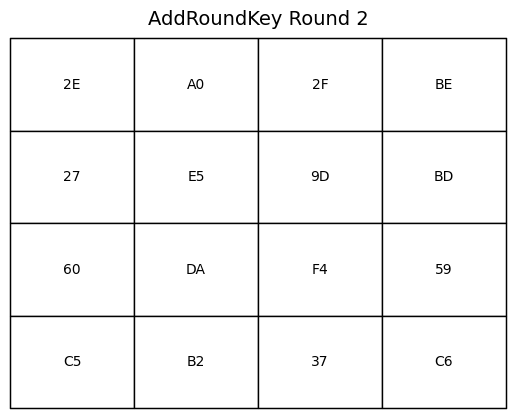

--------------------
Round 3


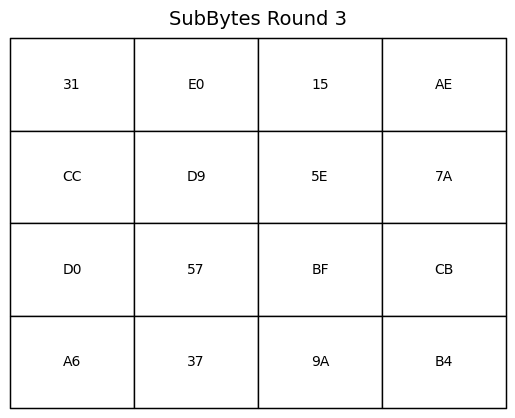

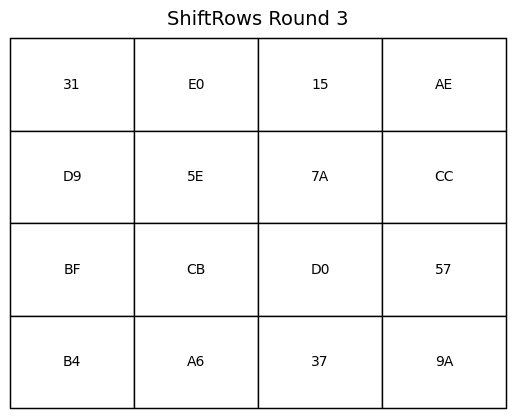

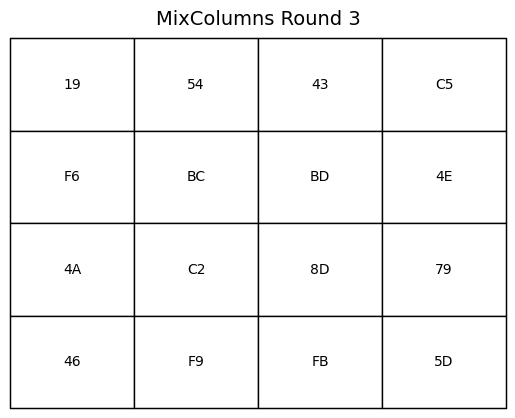

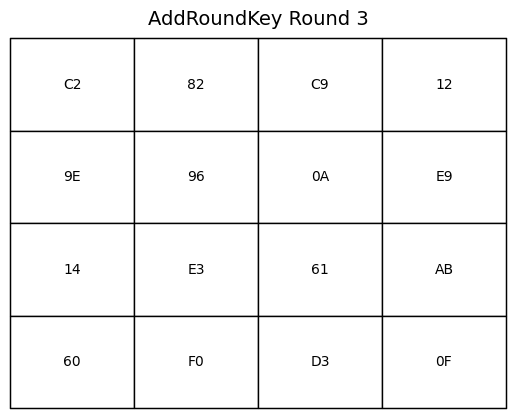

--------------------
Round 4


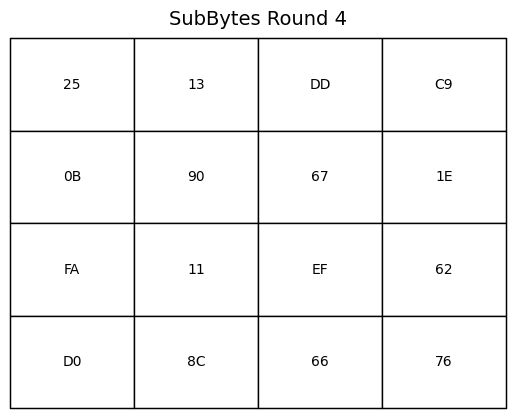

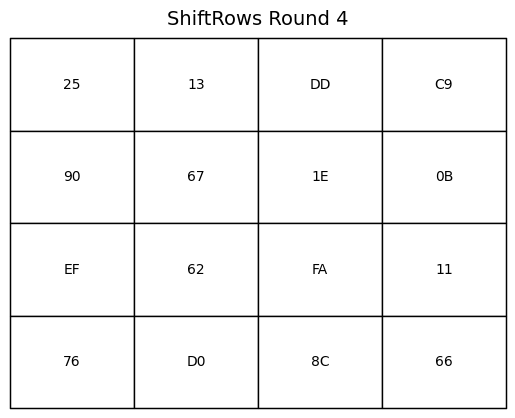

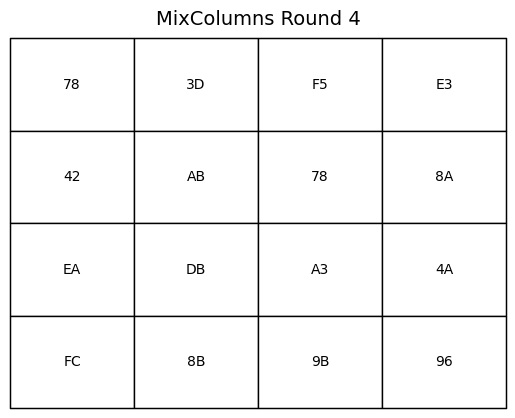

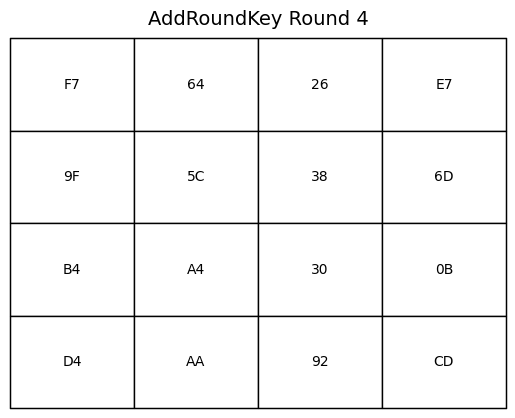

--------------------
Round 5


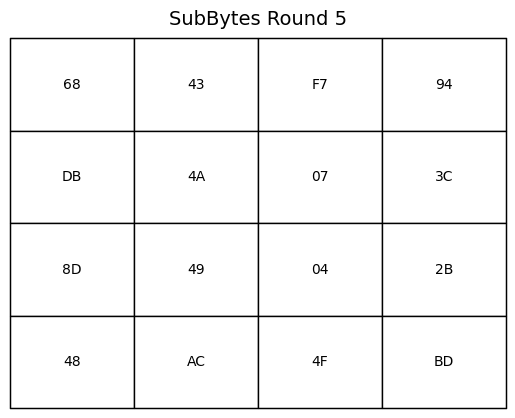

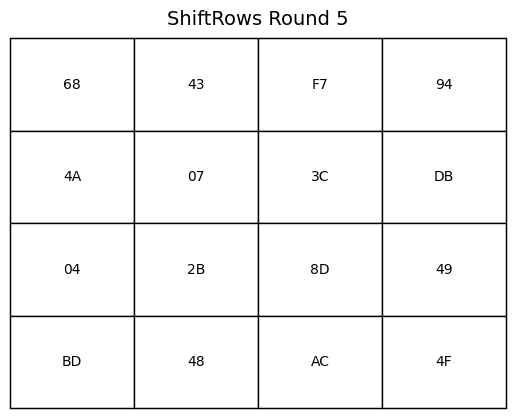

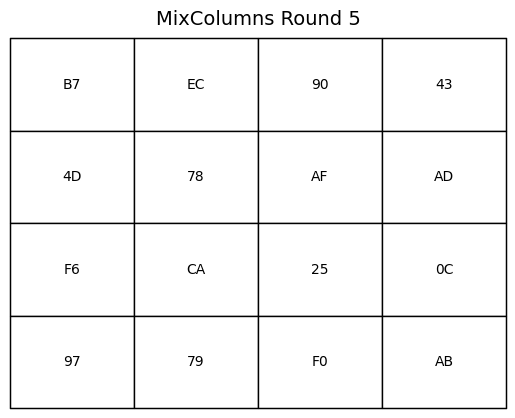

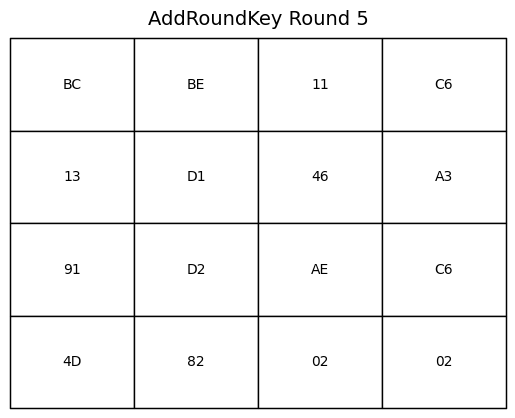

--------------------
Round 6


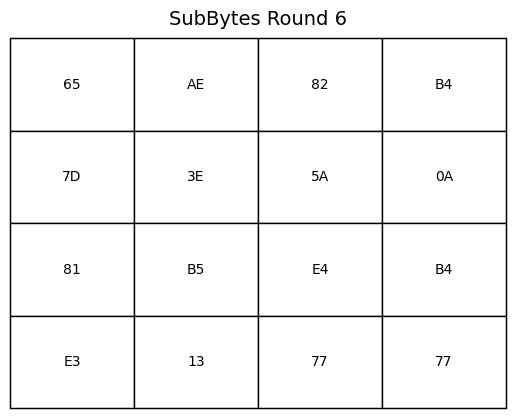

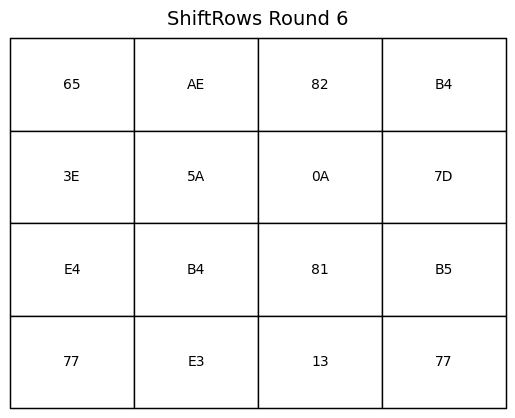

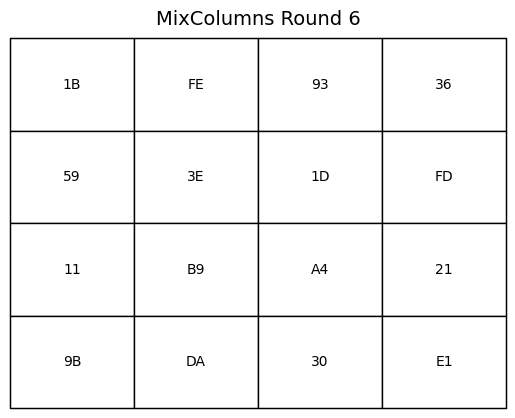

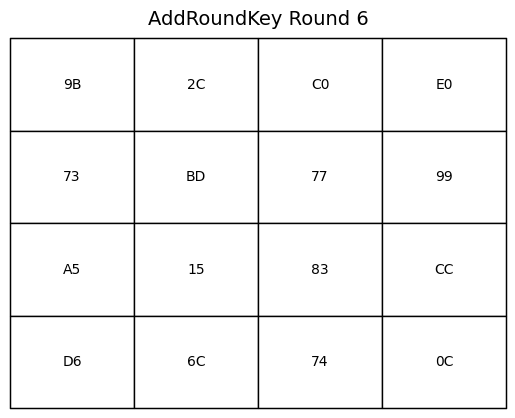

--------------------
Round 7


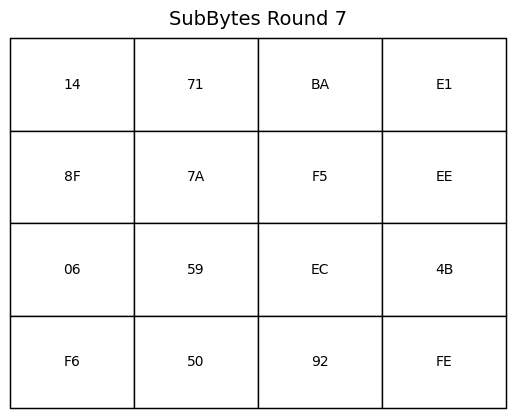

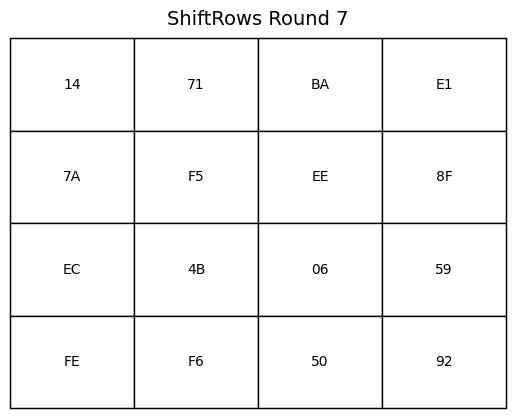

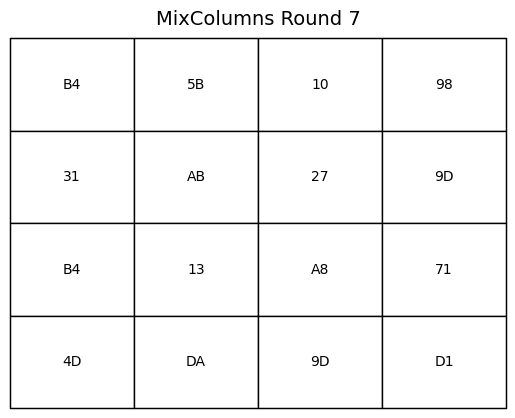

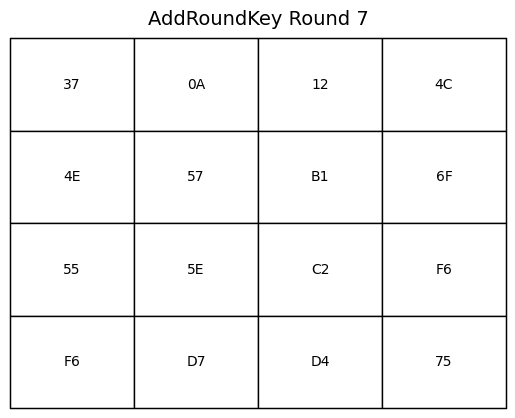

--------------------
Round 8


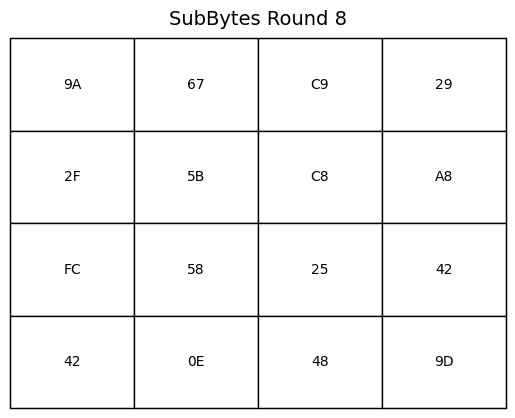

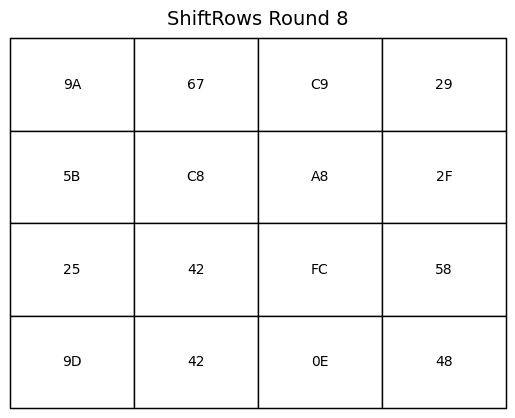

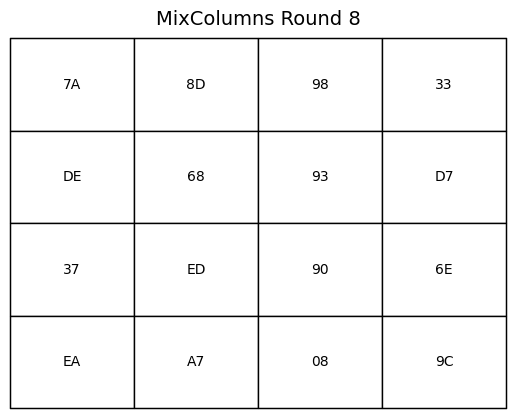

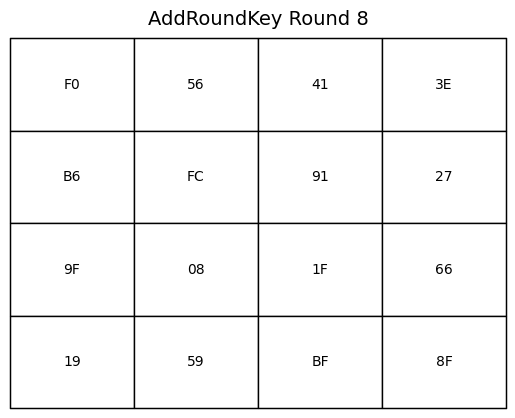

--------------------
Round 9


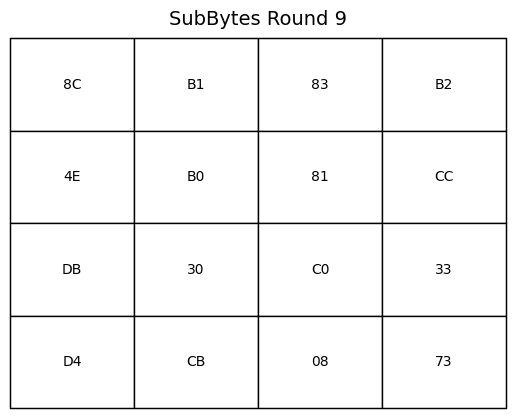

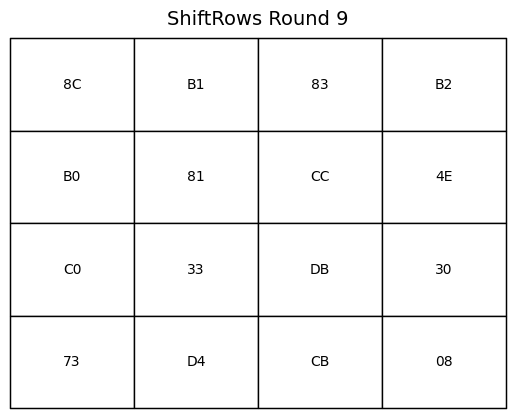

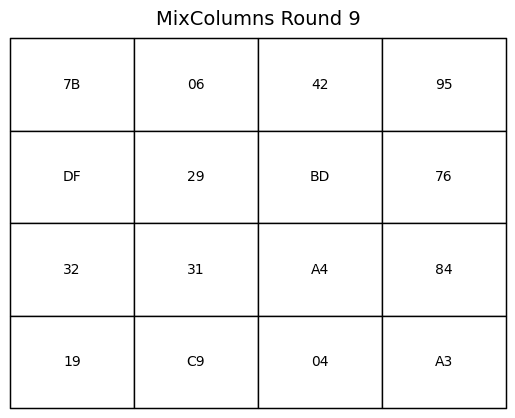

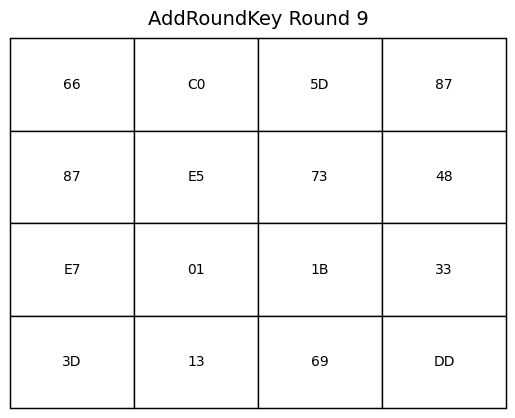

--------------------


In [ ]:
# prompt: buatkan iterasi Transformasi / looping 9 rounds pake fungsi sub_bytes,shift row, mix collumn, dan add roundkey

# Iterasi Transformasi 9 Round
state = initial_round
for round_num in range(1, 10):  # 9 rounds
    print(f"Round {round_num}")
    state = sub_bytes(state, s_box)
    display_table(state, 4, 4, f'SubBytes Round {round_num}')
    state = shift_rows(state)
    display_table(state, 4, 4, f'ShiftRows Round {round_num}')
    state = mix_columns(state)
    display_table(state, 4, 4, f'MixColumns Round {round_num}')
    state = add_round_key(state, round_keys[round_num])
    display_table(state, 4, 4, f'AddRoundKey Round {round_num}')
    print("-" * 20)


# **Final Round**

Round 10


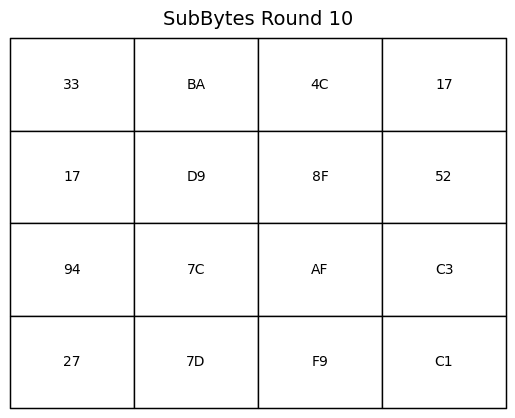

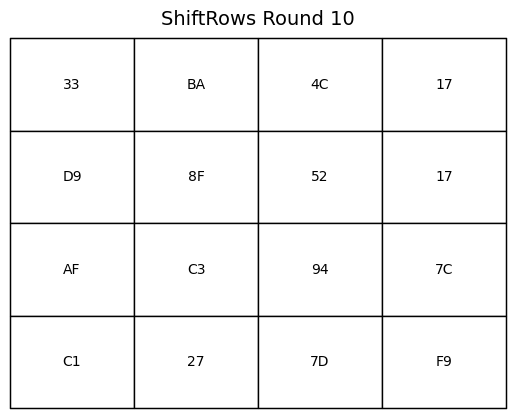

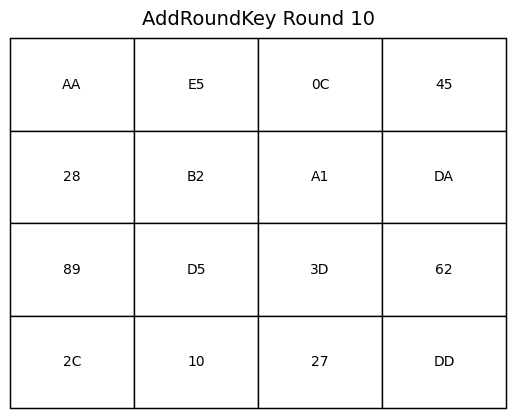

--------------------
Ciphertext:


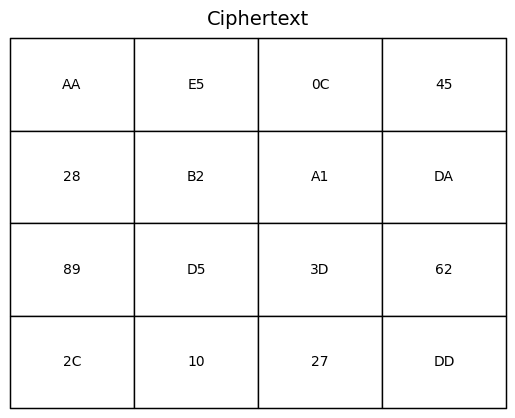

In [ ]:
# Round 10 (tanpa MixColumns)
print("Round 10")
state = sub_bytes(state, s_box)
display_table(state, 4, 4, f'SubBytes Round 10')
state = shift_rows(state)
display_table(state, 4, 4, f'ShiftRows Round 10')
state = add_round_key(state, round_keys[10])
display_table(state, 4, 4, f'AddRoundKey Round 10')
print("-" * 20)

print("Ciphertext:")
display_table(state, 4, 4, 'Ciphertext')

# **Decoding Hexa ke Ascii**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 16 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


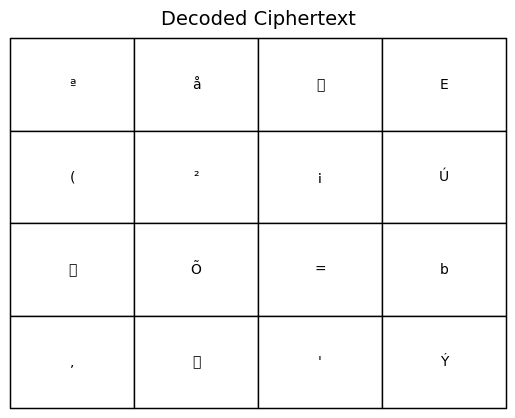

In [ ]:
def hex_to_ascii(hex_matrix):
    ascii_matrix = []
    for row in hex_matrix:
        ascii_row = []
        for hex_val in row:
            try:
                ascii_char = chr(int(hex_val, 16))
                ascii_row.append(ascii_char)
            except ValueError:
                ascii_row.append("Invalid Hex")  # Handle invalid hex values
        ascii_matrix.append(ascii_row)
    return ascii_matrix

decoded_ciphertext = hex_to_ascii(state)

display_table(decoded_ciphertext, 4, 4, 'Decoded Ciphertext')

# **Dekripsi AES**

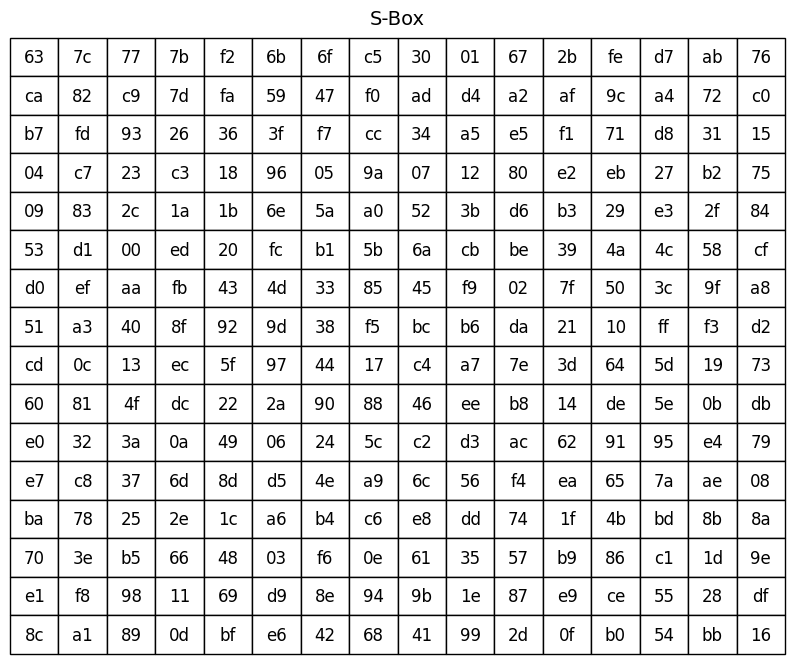

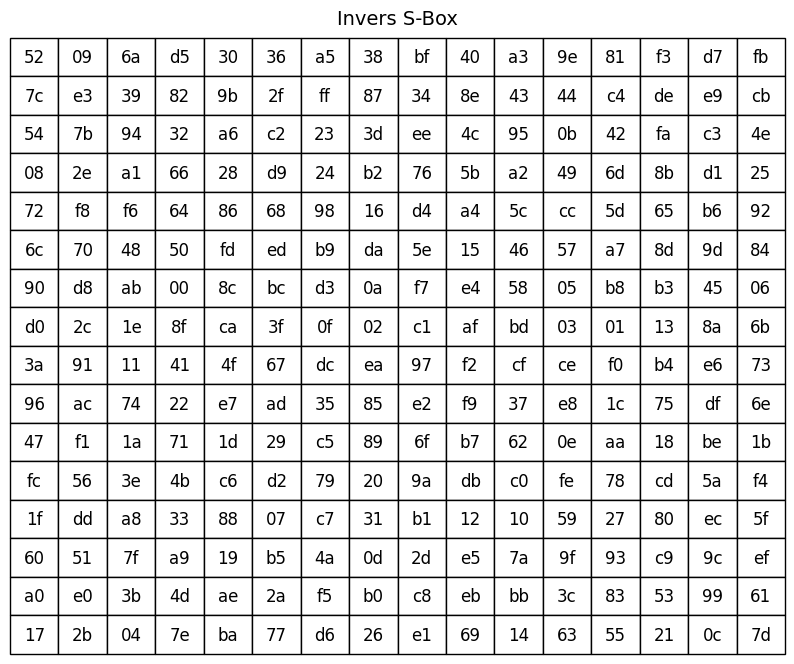

In [ ]:
def generate_inv_s_box(s_box):
    # Membuat matriks 16x16 kosong untuk inverse S-Box
    inv_s_box = [[0] * 16 for _ in range(16)]

    # Iterasi melalui elemen-elemen S-Box untuk menghasilkan inversenya
    for i in range(16):
        for j in range(16):
            value = s_box[i][j]
            row = value >> 4  # Mendapatkan 4 bit pertama sebagai baris
            col = value & 0x0F  # Mendapatkan 4 bit terakhir sebagai kolom
            inv_s_box[row][col] = (i << 4) | j  # Mengisi elemen inverse S-Box

    return inv_s_box

display_sbox(s_box, 'S-Box')

inv_s_box = generate_inv_s_box(s_box )
display_sbox(inv_s_box, 'Invers S-Box')

**Inverse Sub Bytes berdasarkan tabel inv_s_box**

In [ ]:
def inv_sub_bytes(state, inv_s_box):
    """Substitutes bytes in the state matrix using the inverse S-box."""
    for i in range(4):
        for j in range(4):
            row = hex_to_int(state[i][j]) >> 4
            col = hex_to_int(state[i][j]) & 0x0F
            state[i][j] = int_to_hex(inv_s_box[row][col])
    return state

**Inverse Shift Row**

In [ ]:
# Fungsi Inverse Shift Rows
def inv_shift_rows(state):
    inv_shifted_state = [row[:] for row in state]

    inv_shifted_state[1] = inv_shifted_state[1][-1:] + inv_shifted_state[1][:-1]

    inv_shifted_state[2] = inv_shifted_state[2][-2:] + inv_shifted_state[2][:-2]

    inv_shifted_state[3] = inv_shifted_state[3][-3:] + inv_shifted_state[3][:-3]

    return inv_shifted_state

**Inverse Mix Collumn**

In [ ]:
# Fungsi Inverse Mix Columns
def inv_mix_columns(state):
    mixed_state = [['00'] * 4 for _ in range(4)]
    for col in range(4):
        s0 = hex_to_int(state[0][col])
        s1 = hex_to_int(state[1][col])
        s2 = hex_to_int(state[2][col])
        s3 = hex_to_int(state[3][col])

        mixed_state[0][col] = int_to_hex((gf_mult(s0, 0x0e) ^ gf_mult(s1, 0x0b) ^ gf_mult(s2, 0x0d) ^ gf_mult(s3, 0x09)) % 256)
        mixed_state[1][col] = int_to_hex((gf_mult(s0, 0x09) ^ gf_mult(s1, 0x0e) ^ gf_mult(s2, 0x0b) ^ gf_mult(s3, 0x0d)) % 256)
        mixed_state[2][col] = int_to_hex((gf_mult(s0, 0x0d) ^ gf_mult(s1, 0x09) ^ gf_mult(s2, 0x0e) ^ gf_mult(s3, 0x0b)) % 256)
        mixed_state[3][col] = int_to_hex((gf_mult(s0, 0x0b) ^ gf_mult(s1, 0x0d) ^ gf_mult(s2, 0x09) ^ gf_mult(s3, 0x0e)) % 256)
    return mixed_state

**Inverse Add Round Key**

Inverse Add Round Key fungsi sama yang digunakan kaya saat enkripsi namun iterasinya dari 10, 9, 8, .... 0

**Memulai Fungsi Iterasi Decrypt**

In [ ]:
# Fungsi Dekripsi
def decrypt(ciphertext, round_keys, s_box):
    state = ciphertext
    for round_num in range(10, 0, -1): #Iterasi dari round 10 ke 1
        print(f"Round {round_num}")
        state = add_round_key(state, round_keys[round_num])
        display_table(state,4,4,f"AddRoundKey Round {round_num}")
        if round_num !=10:
            state = inv_mix_columns(state)
            display_table(state,4,4,f"InvMixColumn Round {round_num}")
        state = inv_shift_rows(state)
        display_table(state,4,4,f"InvShiftRows Round {round_num}")
        state = inv_sub_bytes(state, s_box)
        display_table(state,4,4,f"InvSubBytes Round {round_num}")
        print("-"*20)
    state = add_round_key(state, round_keys[0]) #Round 0
    display_table(state, 4, 4, "AddRoundKey Round 0")
    return state

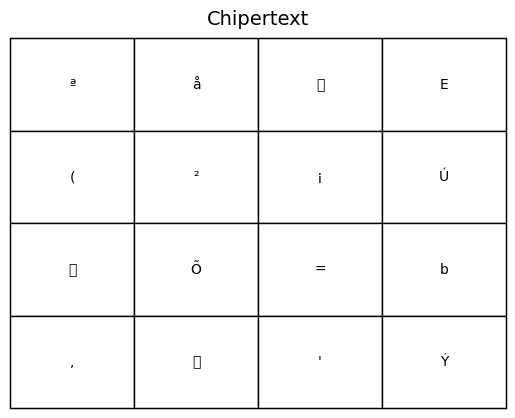

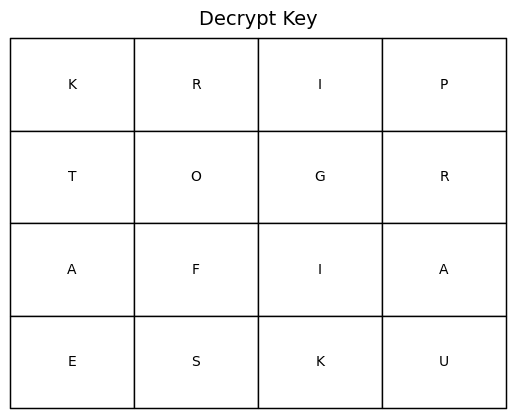

In [ ]:
decrypt_key = [
    ['K', 'R', 'I', 'P'],
    ['T', 'O', 'G', 'R'],
    ['A', 'F', 'I', 'A'],
    ['E', 'S', 'K', 'U']
]

chipertext = decoded_ciphertext

display_table(decoded_ciphertext, 4, 4, "Chipertext")

display_table(decrypt_key, 4, 4, "Decrypt Key")

**Encoding Chipertext dan Decrypt Key to Hexadecimal**

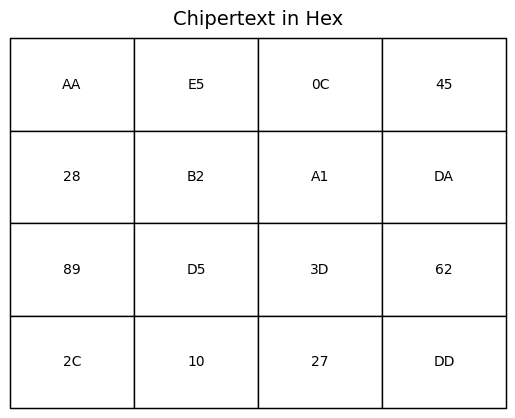

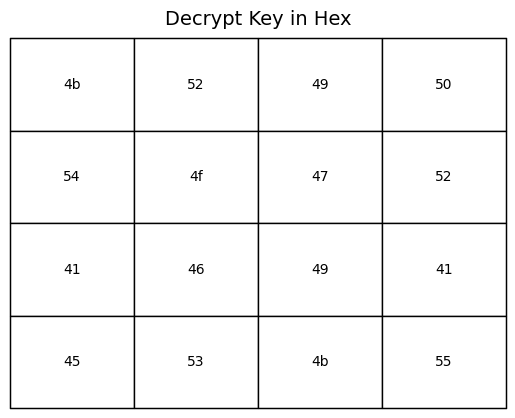

In [ ]:
chiper_key_ascii_hex = state
display_table(chiper_key_ascii_hex, 4, 4, "Chipertext in Hex")

decrypt_key_ascii_hex = [[hex(ord(char))[2:] for char in row] for row in decrypt_key]
display_table(decrypt_key_ascii_hex, 4, 4, "Decrypt Key in Hex")

**Melakukan Key Expansion lagi**

In [ ]:
# Melakukan key_expansion untuk decrypt
decrypt_round_keys = key_expansion(decrypt_key_ascii_hex, s_box, rcon)

**Menjalankan Decrypt AES yakni Inverse dari Fungsi fungsi ecnrypt**

Round 10


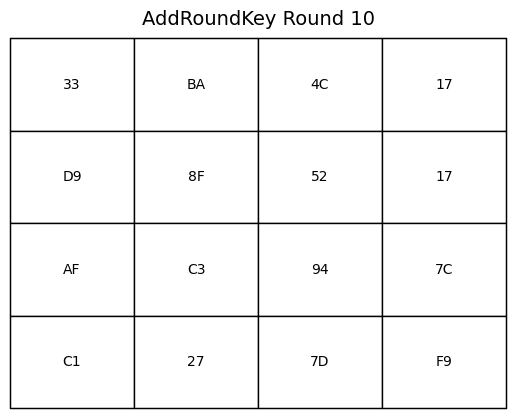

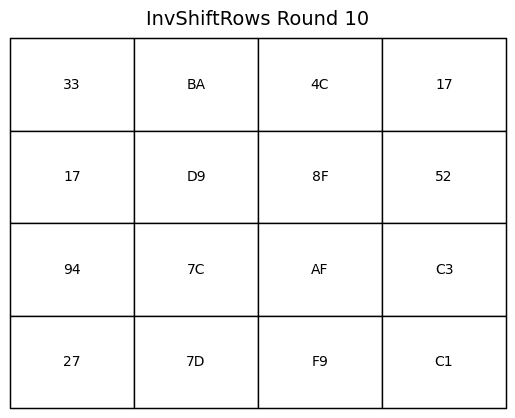

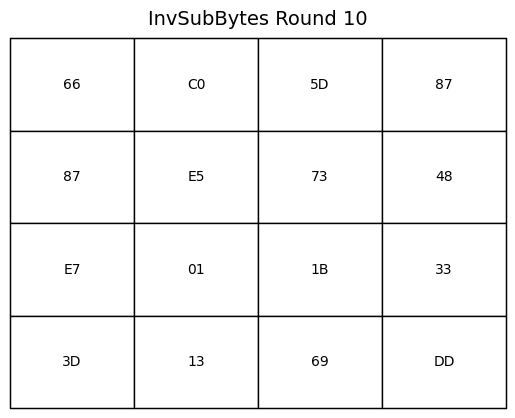

--------------------
Round 9


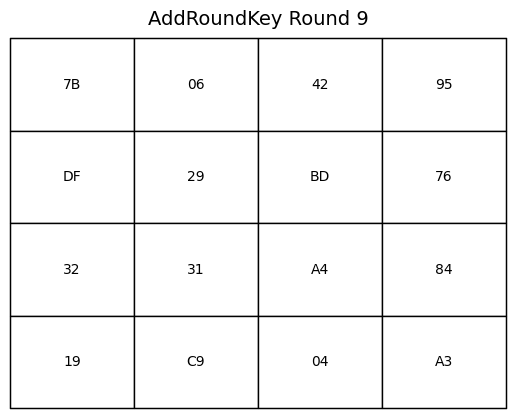

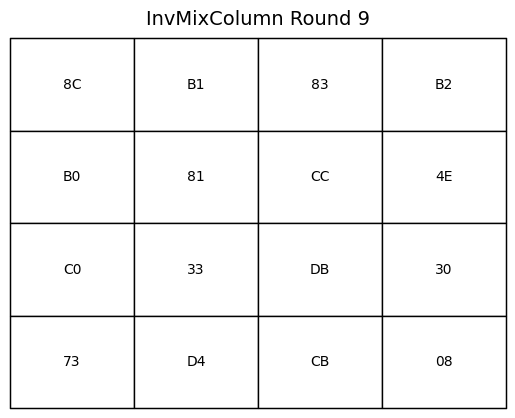

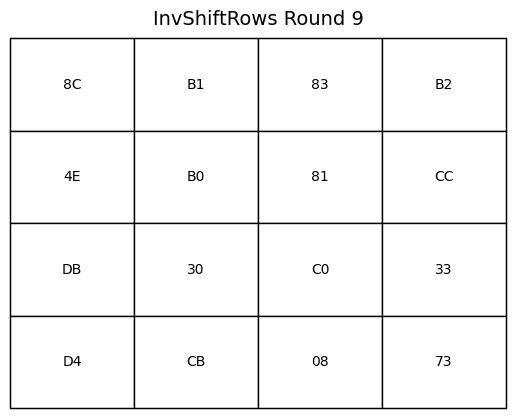

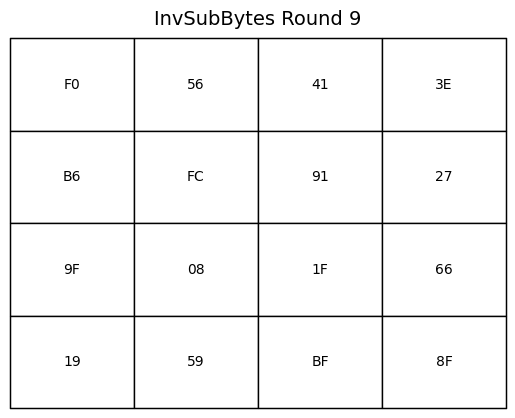

--------------------
Round 8


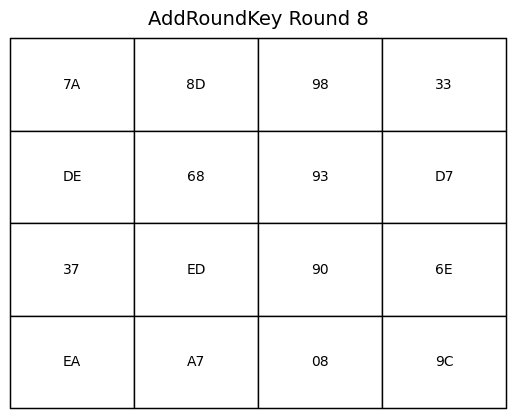

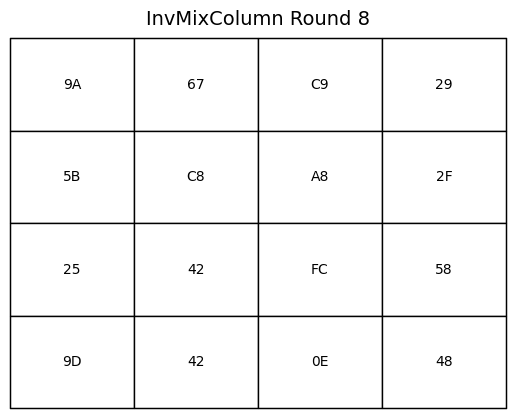

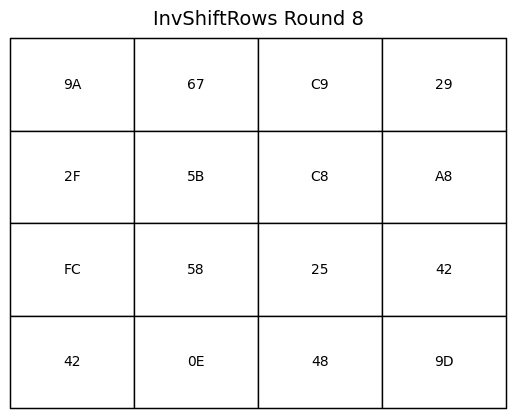

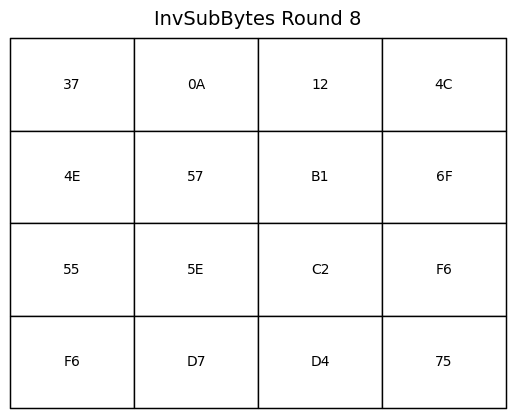

--------------------
Round 7


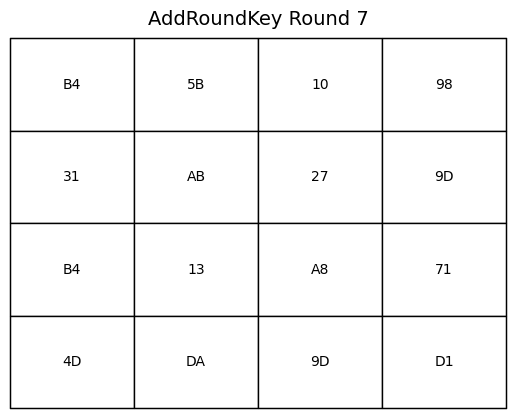

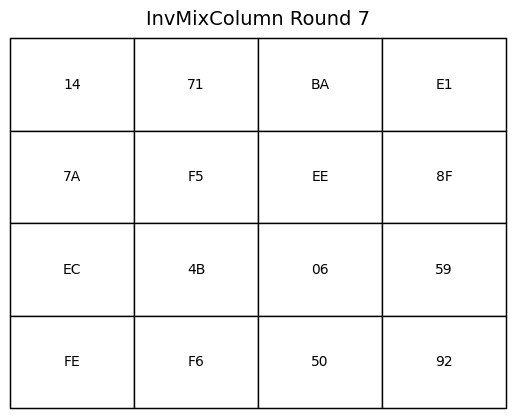

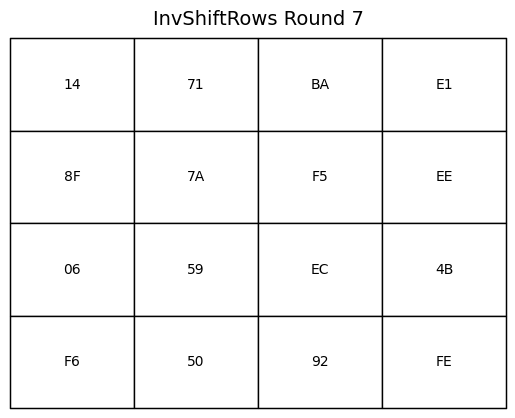

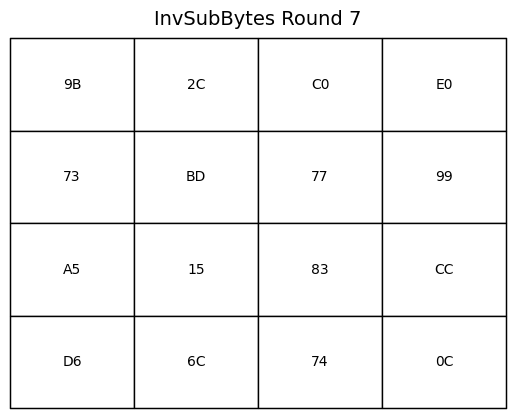

--------------------
Round 6


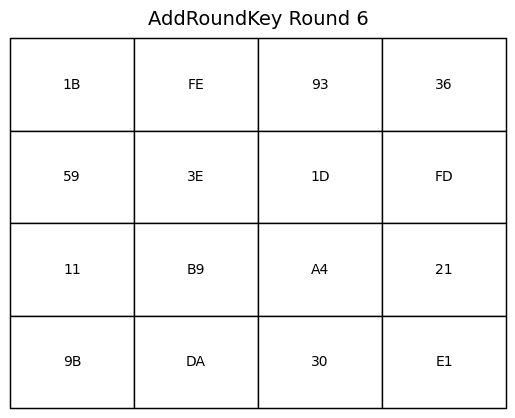

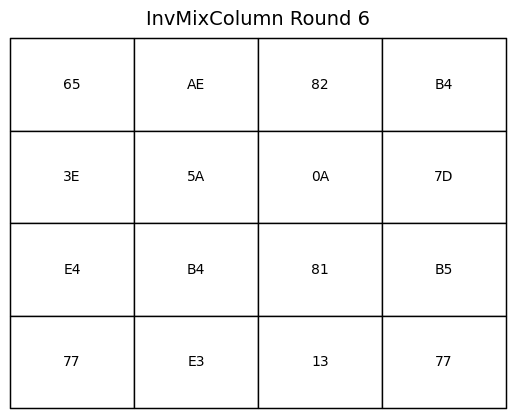

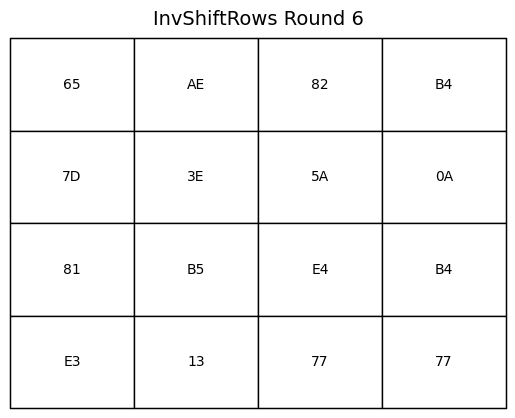

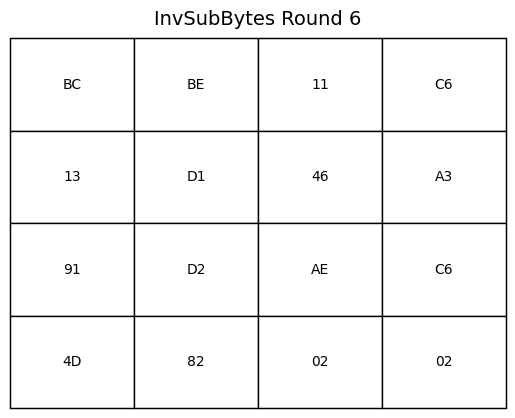

--------------------
Round 5


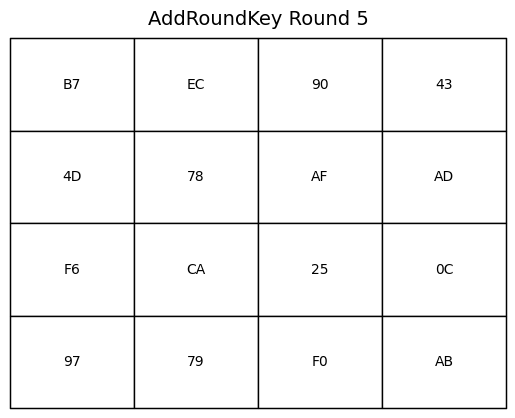

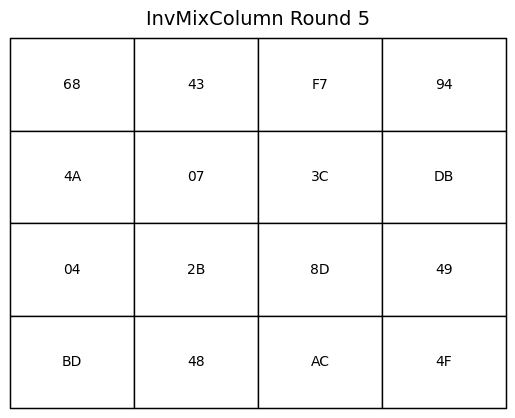

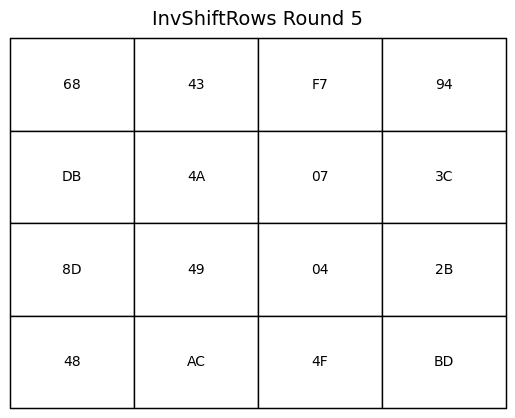

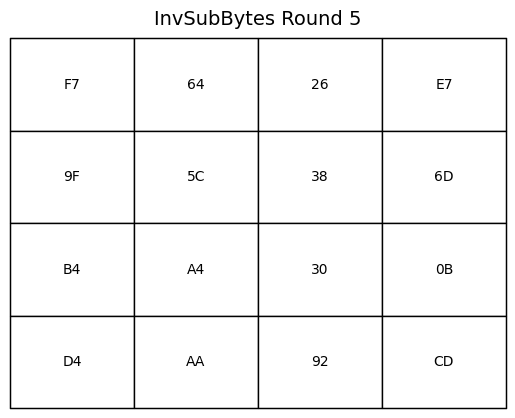

--------------------
Round 4


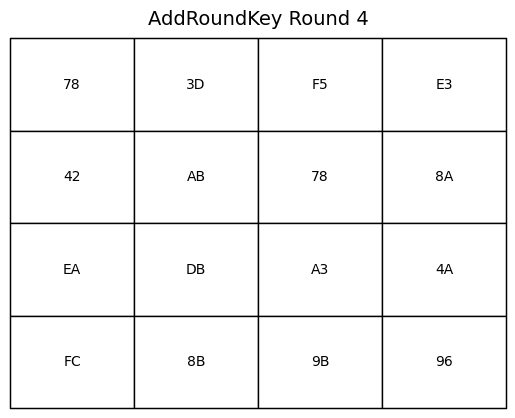

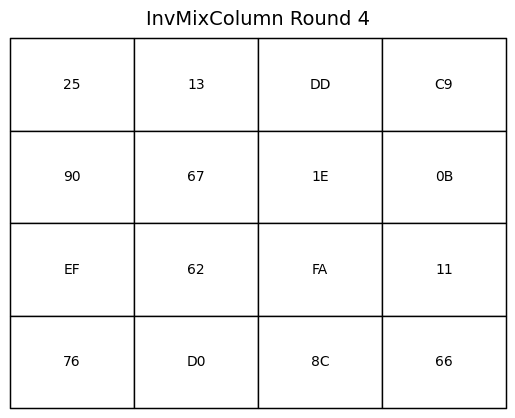

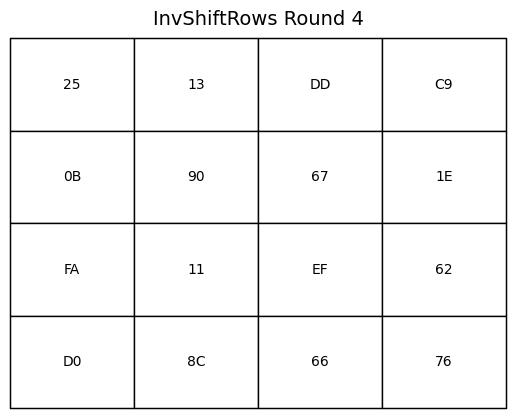

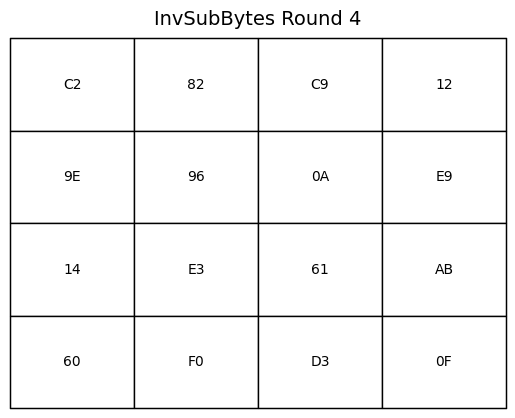

--------------------
Round 3


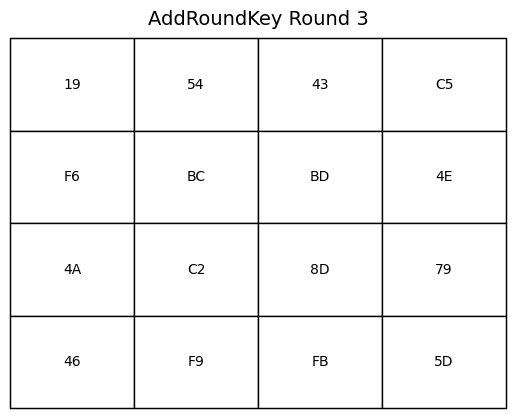

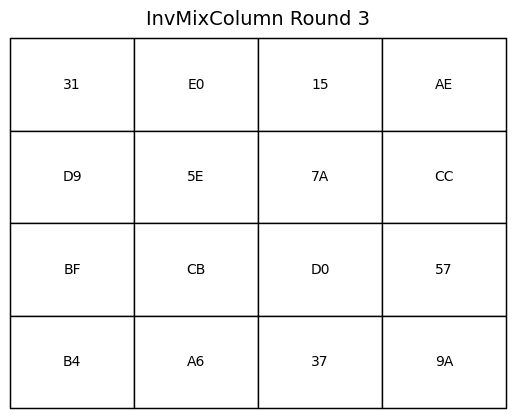

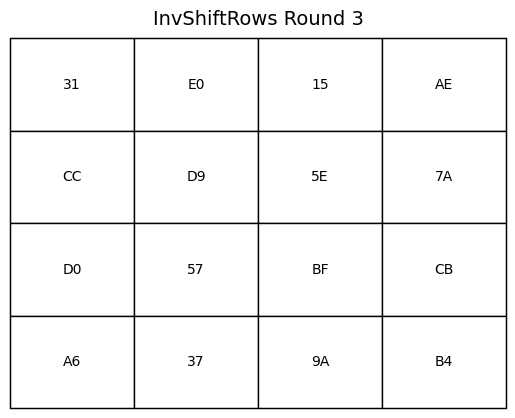

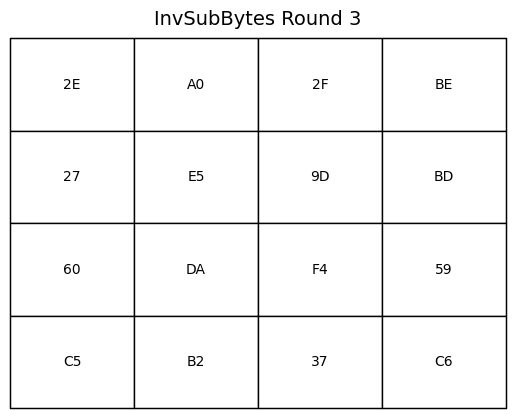

--------------------
Round 2


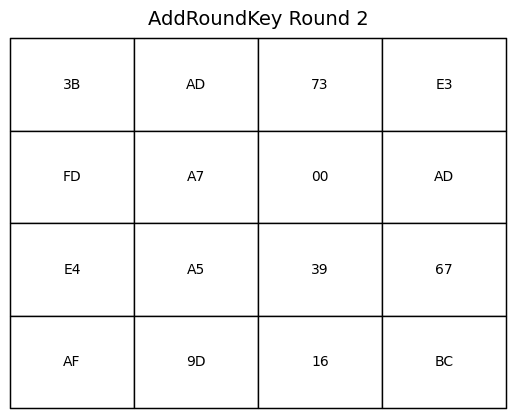

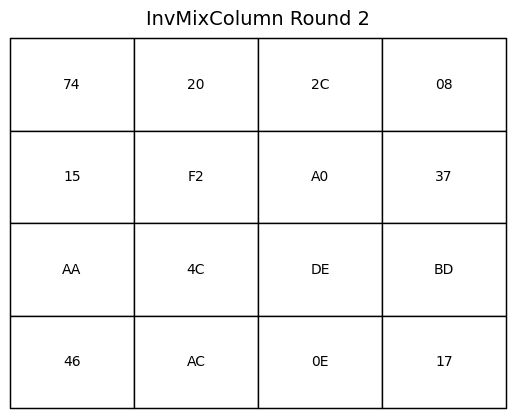

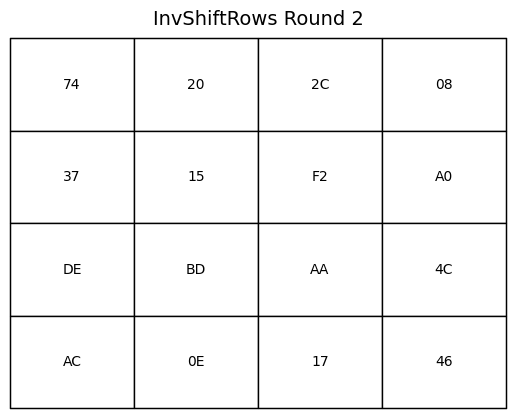

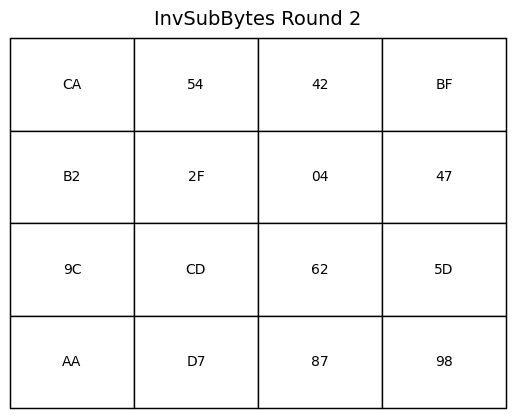

--------------------
Round 1


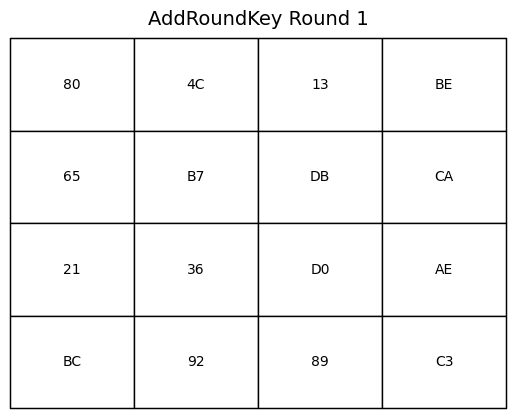

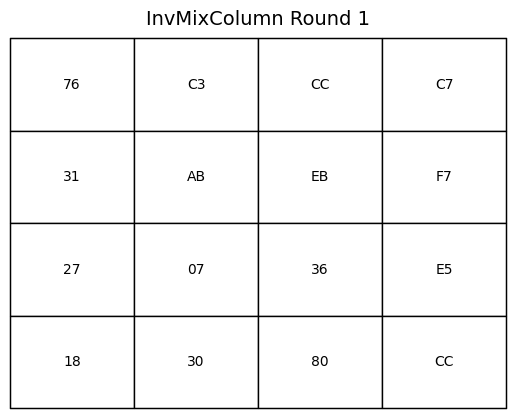

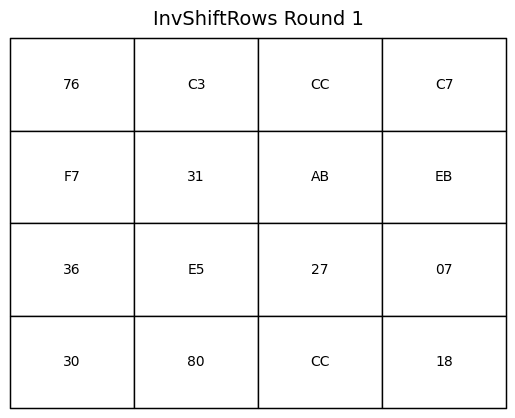

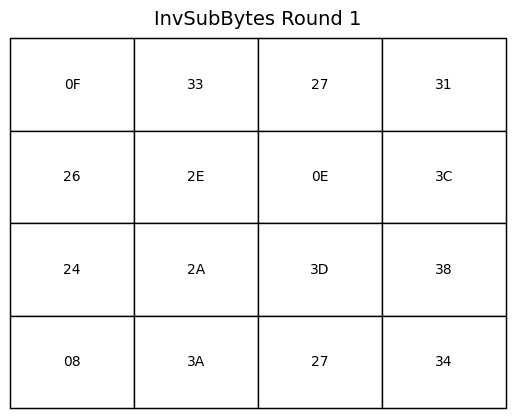

--------------------


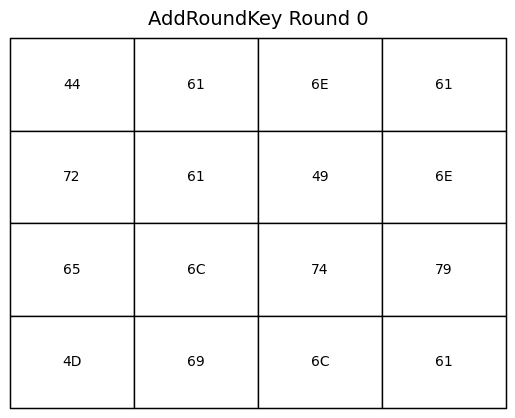

In [ ]:
# Melakukan Dekripsi
decrypted_state = decrypt(state, decrypt_round_keys, inv_s_box)

**Tampil plaintext dari proses decrypt**

Plaintext:


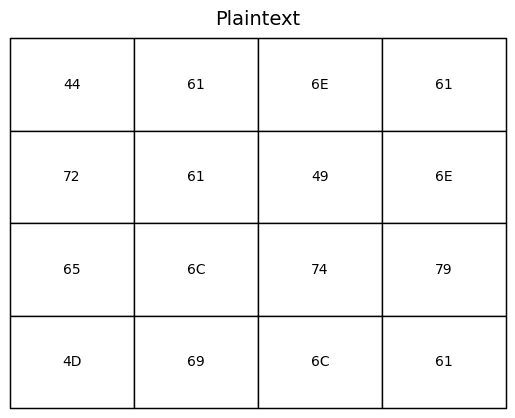

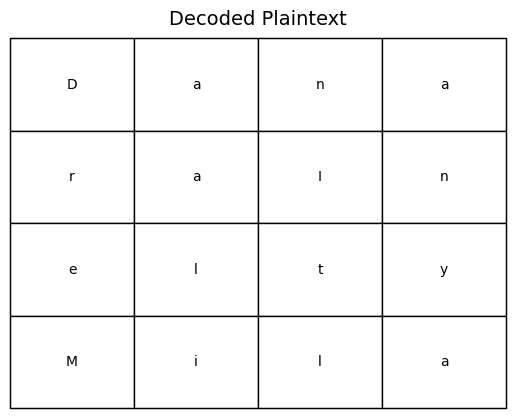

In [ ]:
# Menampilkan Plaintext
print("Plaintext:")
display_table(decrypted_state, 4, 4, "Plaintext")
decoded_plaintext = hex_to_ascii(decrypted_state)
display_table(decoded_plaintext, 4, 4, "Decoded Plaintext")